[nltk_data] Downloading package vader_lexicon to C:\Users\Piyush
[nltk_data]     Bhavsar\AppData\Roaming\nltk_data...


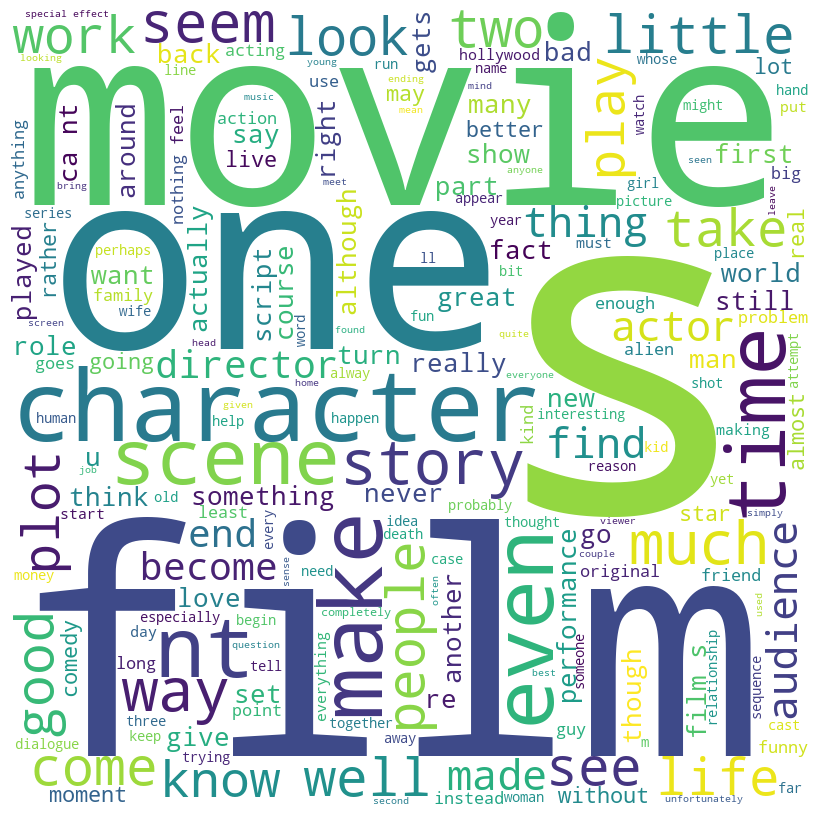

In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Read the dataset
df = pd.read_csv("movie_review.csv")

# Preprocessing
stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: " ".join(word.lower() for word in word_tokenize(x) if word.lower() not in stop_words))
df['text'] = df['text'].apply(lambda x: re.sub('[^\w\s]', '', x))

# Sentiment analysis using VADER
sia = SentimentIntensityAnalyzer()
df['sentiment'] = df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])
print(df[['text', 'sentiment']])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(' '.join(df['text']))

# Plot the WordCloud image
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


                                                    text  sentiment
0      films adapted comic books plenty success  whet...    -0.1119
1      starters  created alan moore  eddie campbell  ...     0.2500
2      say moore campbell thoroughly researched subje...     0.1263
3      book   graphic novel    500 pages long include...     0.3182
4                         words  nt dismiss film source      0.0000
...                                                  ...        ...
64715   lack inspiration traced back insipid characters     -0.2263
64716  like many skits current incarnation _saturday_...     0.3612
64717  watching one  roxbury  skits snl  come away ch...     0.6369
64718                     bump unsuspecting women     s      0.0000
64719  watching _a_night_at_the_roxbury_  ll left exa...     0.0000

[64720 rows x 2 columns]


[nltk_data] Downloading package stopwords to C:\Users\Piyush
[nltk_data]     Bhavsar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Piyush
[nltk_data]     Bhavsar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog', '.', 'The', 'dog', 'jumps', 'over', 'the', 'fence', '.', 'The', 'fox', 'and', 'the', 'dog', 'are', 'friends', '.', 'The', 'fox', 'is', 'quick', 'and', 'brown', '.']
['The quick brown fox jumps over the lazy dog.', 'The dog jumps over the fence.', 'The fox and the dog are friends.', 'The fox is quick and brown.']


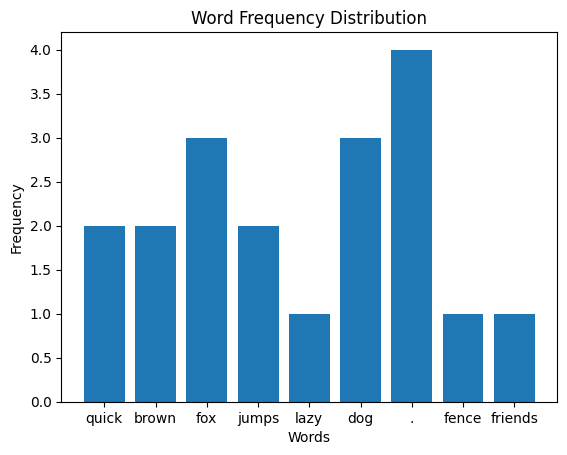

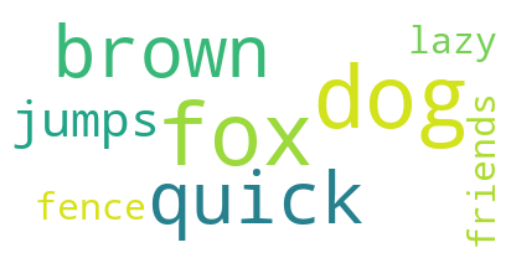

In [3]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud

nltk.download('stopwords')
nltk.download('punkt')

# Example text paragraph
text = "The quick brown fox jumps over the lazy dog. The dog jumps over the fence. The fox and the dog are friends. The fox is quick and brown."

# Remove stopwords
stop_words = set(stopwords.words('english'))
words = word_tokenize(text)
filtered_words = [word for word in words if not word.lower() in stop_words]
print(words)

# Tokenize the paragraph to extract sentences
sentences = sent_tokenize(text)
print(sentences)

# Calculate the word frequency distribution
word_counts = {}
for word in filtered_words:
    if word in word_counts:
        word_counts[word] += 1
    else:
        word_counts[word] = 1

# Plot the word frequency distribution
plt.bar(word_counts.keys(), word_counts.values())
plt.title('Word Frequency Distribution')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

# Plot the wordcloud
wordcloud = WordCloud(background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [4]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from heapq import nlargest

# Define the text paragraph
text = "So, keep working. Keep striving. Never give up. Fall down seven times, get up eight. Ease is a greater threat to progress than hardship. Ease is a greater threat to progress than hardship. So, keep moving, keep growing, keep learning. See you at work."

# Preprocess the text to remove special characters and digits
text = re.sub(r'[^\w\s]', '', text)
text = re.sub(r'\d+', '', text)

# Tokenize the text into sentences and words
sentences = sent_tokenize(text)
words = word_tokenize(text)

# Remove stop words from the words list
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.lower() not in stop_words]

# Calculate the word frequency for each word
word_frequency = {}
for word in filtered_words:
    if word in word_frequency:
        word_frequency[word] += 1
    else:
        word_frequency[word] = 1

# Calculate the sentence scores based on the word frequency
sentence_scores = {}
for i, sentence in enumerate(sentences):
    for word in word_tokenize(sentence.lower()):
        if word in word_frequency:
            if i in sentence_scores:
                sentence_scores[i] += word_frequency[word]
            else:
                sentence_scores[i] = word_frequency[word]

# Get the top 2 sentences with the highest scores
summary_sentences_indices = nlargest(2, sentence_scores, key=sentence_scores.get)
summary_sentences = [sentences[i] for i in summary_sentences_indices]

# Join the summary sentences into a summary paragraph
summary = " ".join(summary_sentences)

# Print the summary
print(summary)


So keep working Keep striving Never give up Fall down seven times get up eight Ease is a greater threat to progress than hardship Ease is a greater threat to progress than hardship So keep moving keep growing keep learning See you at work


In [5]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd
te=TransactionEncoder()

transactions = [['Tata', 'Nexon', '2017'],
                ['MG', 'Astor', '2021'],
                ['KIA', 'Seltos', '2019'],
                ['Hyundai', 'Creata', '2015']]

te_array=te.fit(transactions).transform(transactions)
df=pd.DataFrame(te_array, columns=te.columns_)
print(df)

freq_items = apriori(df, min_support=0.5, use_colnames=True)

print(freq_items)

rules=association_rules(freq_items,metric='support',min_threshold=0.05)

rules=rules.sort_values(['support','confidence'],ascending=[False,False])

print(rules)

TypeError: '<' not supported between instances of 'str' and 'int'